In [ ]:
pip install pandas numpy scikit-learn streamlit matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.5 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

students = 200
topics = ["Algebra", "Calculus", "Probability", "Statistics", "Trigonometry"]

data = []

for student_id in range(1, students+1):
    for topic in topics:
        for quiz in range(1, 11):
            score = np.random.randint(30, 100)
            time_taken = np.random.randint(5, 30)

            data.append([student_id, topic, quiz, score, time_taken])

df = pd.DataFrame(data, columns=[
    "student_id", "topic", "quiz_no", "score", "time_taken"
])

df.to_csv("student_data.csv", index=False)

print("Dataset Created!")


Dataset Created!


In [3]:
import pandas as pd

df = pd.read_csv("student_data.csv")

print(df.head())
print(df.describe())


   student_id    topic  quiz_no  score  time_taken
0           1  Algebra        1     81          19
1           1  Algebra        2     90          25
2           1  Algebra        3     53           7
3           1  Algebra        4     51          25
4           1  Algebra        5     31          28
         student_id       quiz_no         score    time_taken
count  10000.000000  10000.000000  10000.000000  10000.000000
mean     100.500000      5.500000     64.407500     17.114900
std       57.737192      2.872425     20.211662      7.250955
min        1.000000      1.000000     30.000000      5.000000
25%       50.750000      3.000000     47.000000     11.000000
50%      100.500000      5.500000     64.000000     17.000000
75%      150.250000      8.000000     82.000000     23.000000
max      200.000000     10.000000     99.000000     29.000000


In [ ]:
# Calculate average per student per topic
avg_scores = df.groupby(["student_id", "topic"])["score"].mean().reset_index()

def label_strength(score):
    if score < 60:
        return "Weak"
    elif score < 75:
        return "Moderate"
    else:
        return "Strong"

avg_scores["strength"] = avg_scores["score"].apply(label_strength)

print(avg_scores.head())


   student_id         topic  score  strength
0           1       Algebra   62.3  Moderate
1           1      Calculus   66.4  Moderate
2           1   Probability   56.2      Weak
3           1    Statistics   73.0  Moderate
4           1  Trigonometry   51.7      Weak


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode topic
le = LabelEncoder()
avg_scores["topic_encoded"] = le.fit_transform(avg_scores["topic"])

# Encode strength
strength_encoder = LabelEncoder()
avg_scores["strength_encoded"] = strength_encoder.fit_transform(avg_scores["strength"])

X = avg_scores[["score", "topic_encoded"]]
y = avg_scores["strength_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        45

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_reg = df[["quiz_no", "time_taken"]]
y_reg = df["score"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2)

reg_model = RandomForestRegressor()
reg_model.fit(X_train_r, y_train_r)

pred_r = reg_model.predict(X_test_r)

print("MSE:", mean_squared_error(y_test_r, pred_r))


MSE: 424.0701483420035


In [ ]:
def generate_study_plan(strength):
    if strength == "Weak":
        return "Study 2 hours daily + Practice 20 questions"
    elif strength == "Moderate":
        return "Study 1 hour daily + Practice 10 questions"
    else:
        return "Revise twice a week"

print(generate_study_plan("Weak"))


Study 2 hours daily + Practice 20 questions


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("student_data.csv")

st.title("🎓 SkillSprint AI")

student_id = st.number_input("Enter Student ID", min_value=1, max_value=200)

student_data = df[df["student_id"] == student_id]

st.write("### Student Data")
st.write(student_data)

avg_scores = student_data.groupby("topic")["score"].mean()

st.write("### Average Score per Topic")
st.bar_chart(avg_scores)

def label_strength(score):
    if score < 60:
        return "Weak"
    elif score < 75:
        return "Moderate"
    else:
        return "Strong"

st.write("### Strength Analysis")
for topic, score in avg_scores.items():
    strength = label_strength(score)
    st.write(f"{topic}: {strength}")


2026-02-15 13:20:36.883 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 13:20:37.613 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-15 13:20:37.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 13:20:37.619 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 13:20:37.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 13:20:37.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 13:20:37.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 13:20:37.634 Thread 'MainThread': mi

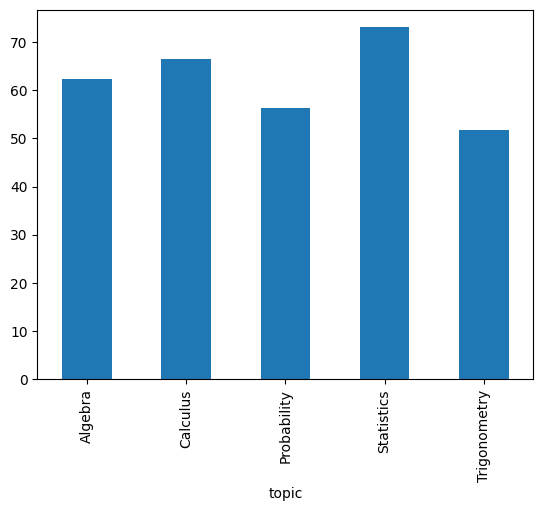

In [ ]:
import matplotlib.pyplot as plt

avg_scores.plot(kind='bar')
plt.show()


In [ ]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [ ]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>